### env
python = 3.x

In [4]:
import sys
import base64
import requests

import pandas as pd
import numpy as np

from PIL import Image
from io import BytesIO
from IPython.display import HTML

In [10]:
shape = (300,300)

def f(string):
    frame = sys._getframe(1)
    return string.format(**frame.f_locls)

def get_thumbnail(url):
    try:
        response = requests.get(url)
        i = Image.open(BytesIO(response.content)).resize(shape,Image.ANTIALIAS)
        i = i.convert('RGB')
    except:
        i = Image.fromarray(np.zeros(shape[0],shape[1],3))
        i = i.convert('RGB')
    
    i.thumbnail(shape, Image.LANCZOS)
    return i

def image_base64(im):
    if isinstance(im,str):
        im = get_thumbnail(im)
    with BytesIO() as buffer:
        im.save(buffer,'jpeg')
        return base64.b64encode(buffer.getvalue()).decode()

def image_formatter(im):
    value = image_base64(im)
    return '<img src="data:image/jpeg;base64,{}", width="300", height="300">'.format(value)

In [11]:
prd_nm = ['삼다수1','삼다수2','삼다수3']

In [12]:
url_list = ['http://i.011st.com/ex_t/R/400x400/1/85/0/src/dl/17/5/2/5/1/4/1/zfRvt/25525141_117426425.jpg',
            'http://i.011st.com/ex_t/R/400x400/1/85/0/src/pd/18/7/0/9/9/2/1/sbBDs/1859709921_B.jpg',
            'http://i.011st.com/ex_t/R/400x400/1/85/0/src/al/6/7/0/0/4/6/189670046_B_V5.jpg'
           ]

In [13]:
df = pd.DataFrame({'prd_nm':prd_nm, 'url_list':url_list})
df.head()

,prd_nm,url_list
0,삼다수1,http://i.011st.com/ex_t/R/400x400/1/85/0/src/dl/17/5/2/5/1/4/1/zfRvt/25525141_117426425.jpg
1,삼다수2,http://i.011st.com/ex_t/R/400x400/1/85/0/src/pd/18/7/0/9/9/2/1/sbBDs/1859709921_B.jpg
2,삼다수3,http://i.011st.com/ex_t/R/400x400/1/85/0/src/al/6/7/0/0/4/6/189670046_B_V5.jpg


,prd_nm,url_list,image
0,삼다수1,http://i.011st.com/ex_t/R/400x400/1/85/0/src/dl/17/5/2/5/1/4/1/zfRvt/25525141_117426425.jpg,
1,삼다수2,http://i.011st.com/ex_t/R/400x400/1/85/0/src/pd/18/7/0/9/9/2/1/sbBDs/1859709921_B.jpg,
2,삼다수3,http://i.011st.com/ex_t/R/400x400/1/85/0/src/al/6/7/0/0/4/6/189670046_B_V5.jpg,

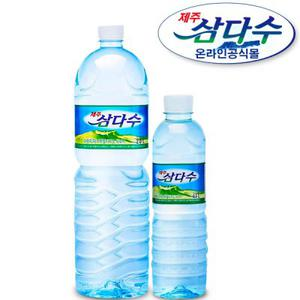
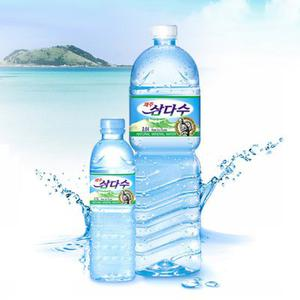
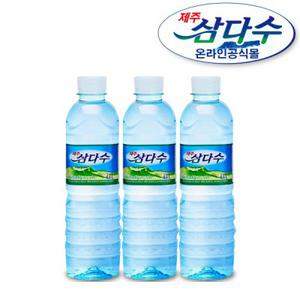

In [14]:
pd.set_option('display.max_colwidth', -1)
df['image'] = df.url_list.map(lambda f:get_thumbnail(f))
disp = df.to_html(formatters={'image':image_formatter},escape=False)
HTML(disp)